005-1
[作業目標]
利用範例的創建方式, 創建一組資料, 並練習如何取出最大值

[作業重點]
練習創立 DataFrame (In[2])
如何取出口數最多的國家 (In[3], Out[3])

練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家
Hints: 隨機產生數值

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {'國家':['Taiwan','USA','Japan'] ,
        '人口':[np.random.randint(0,10000), np.random.randint(0,10000), np.random.randint(0,10000)]}
df = pd.DataFrame(data)

In [3]:
df.head()

,國家,人口
0,Taiwan,1754
1,USA,2936
2,Japan,3671


In [4]:
df['人口'].max()

3671

In [5]:
df[df['人口'] == df['人口'].max()]

,國家,人口
2,Japan,3671


In [6]:
df[df['人口'] == df['人口'].max()]['國家']

2    Japan
Name: 國家, dtype: object

005-2
讀取 txt 檔
請讀取 text file
懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

Hints: 使用 Request 抓取資料
Hints: 字串分割
Hints: 例外處理: Try-Except

[作業目標]
試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

[作業重點]
從網頁上讀取連結清單 (In[1], In[2])
從清單網址讀取圖片 (In[6]In[9], Out[6]Out[9])

In [7]:
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [8]:
import requests
try:
    response = requests.get(target_url)
    data = response.text
except:
    print('URL isnt availble')
else:
    print('loading data sucessfully')

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

loading data sucessfully
784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [9]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'
data_split = data.split(split_tag)
print(len(data_split))
data_split[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

In [10]:
data_split = data_split[:-1]

In [11]:
number = []
url = []
for i in range(len(data_split)):
    new_list = data_split[i].split('\t')
    #print(new_list)
    
    number.append(new_list[0])
    url.append(new_list[1])
url

['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg',
 'http://img172.imageshack.us/img172/4606/napo03072en9.jpg',
 'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg',
 'http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg',
 'http://www.porschemania.it/discus/messages/815/102099.jpg',
 'http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg',
 'http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg',
 'http://farm4.static.flickr.com/3217/2942611930_d68204f726.jpg',
 'http://farm1.static.flickr.com/29/54608382_ee8bd4f7fa.jpg',
 'http://www.dierentuin.nl/images/jongengiraffe.jpg',
 'http://farm4.static.flickr.com/3279/3118

將 txt 轉成 pandas dataframe

In [12]:
import pandas as pd
data = {
    'number': number,
    'url': url
}
    
df = pd.DataFrame(data)
df.head()

,number,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


讀取圖片，請讀取上面 data frame 中的前 5 張圖片

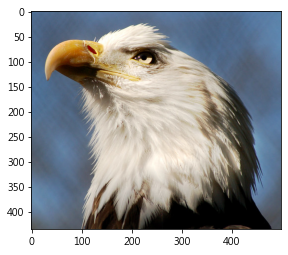

In [13]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0, 'url']

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array
img = np.array(img)
plt.imshow(img)
plt.show()

In [14]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    
    for url in url_list:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img = np.array(img)
        img_list.append(img)
        
    
    return img_list

In [17]:
try:
    result = img2arr_fromURLs(df[0:5]['url'].values)
except:
    print('img unvailable')
else:
    print('all img available')

img unvailable


all img available
Total images that we got: 4 


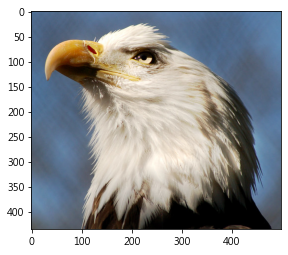

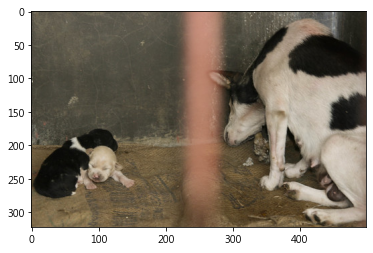

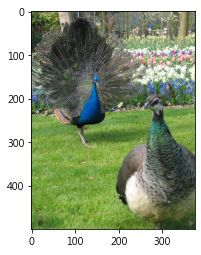

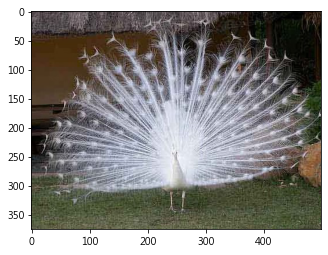

In [16]:
try:
    result = img2arr_fromURLs(df[0:4]['url'].values)
except:
    print('img unvailable')
else:
    print('all img available')
    
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉
for im_get in result:
    plt.imshow(im_get)
    plt.show()